# Logistic regression

In the following we introduce the analysis method of logistic regression needed for binary classification. We do this via the analysis of two data sets. In one data set one is supposed to predict failure of success while in the other breast cancer data is checked for benign/malign cases.

For more information on logistic regression, we refer to https://en.wikipedia.org/wiki/Logistic_regression, https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 and https://towardsdatascience.com/logistic-regression-python-7c451928efee.

In [47]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [17]:
#define data frame
df = pd.read_csv("classification.csv")

#to trop columns 
#df = df.drop("name of column", axis = 1)

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [18]:
#define variables and proceed with train/test split
X = df[["age", "interest"]].values
Y = df["success"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

In [26]:
#print(Y)

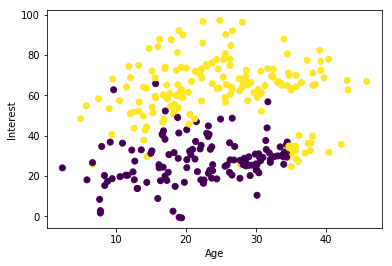

In [32]:
#visialize some of the data
plt.scatter(X[:, 0], X[:, 1], c = Y) #takes as color 0 or 1 (success/not) from Y
plt.xlabel("Age")
plt.ylabel("Interest")
plt.show()

In [35]:
#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

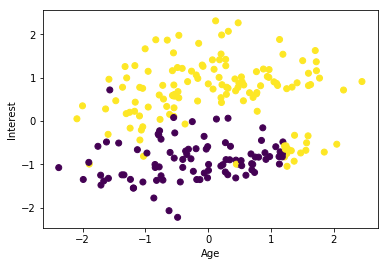

In [36]:
#visialize the rescaled data
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train) #takes as color 0 or 1 (success/not) from Y_train
plt.xlabel("Age")
plt.ylabel("Interest")
plt.show()

In [44]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test) #to predict if successful or not

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


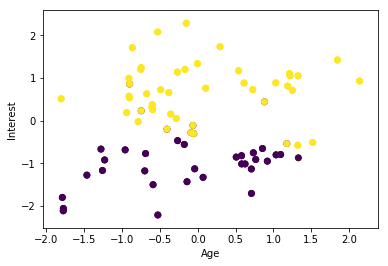

In [45]:
#visialize the test data vs. predicted data
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test) #takes as color 0 or 1 (success/not) from Y_test
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_predicted) #takes as color 0 or 1 (success/not) from Y_predicted
plt.xlabel("Age")
plt.ylabel("Interest")
plt.show()

Comment: We can see that the logistic regression predicts rather well. We would like to quantify this mathematically rather than optically:

In [46]:
#score the quality of the prediction
print(model.score(X_test, Y_test))

0.88


This shows that the predictions are to 88% accurate.

We would like to illustrate the classification boundary. Which allows us to more easily see where the model fails to predict corretly. We do so first on the training and then on the test data.

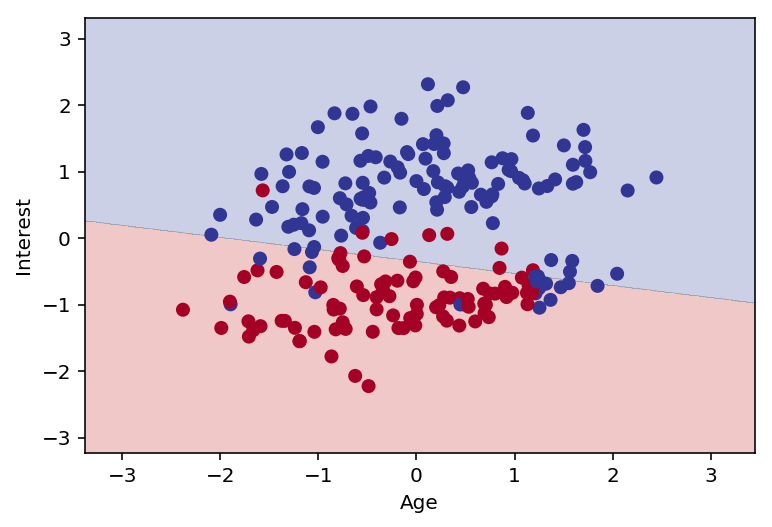

In [49]:
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

The blue shaded region is the one where the model predicts success the red failure. Dots of the other color in the respective regions indicate where the model fails to do a good job.

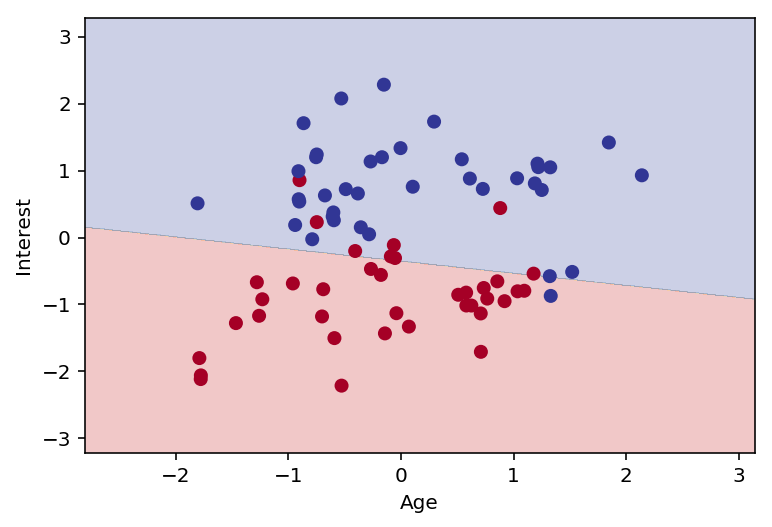

In [50]:
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

Notice that this plotting with a hard boundary is a simplification of what is truly going on. Given that the logistic regression makes use of the logistic function/sigmoid function it is clear that the transition between the two regions is rather smooth. This can be visualized using the option "proba = True" above:

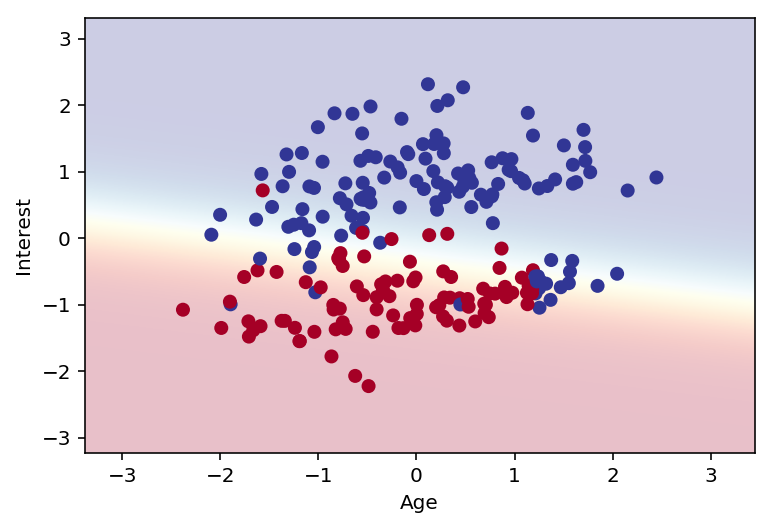

In [51]:
plot_classifier(model, X_train, Y_train, proba = True, xlabel = "Age", ylabel = "Interest")

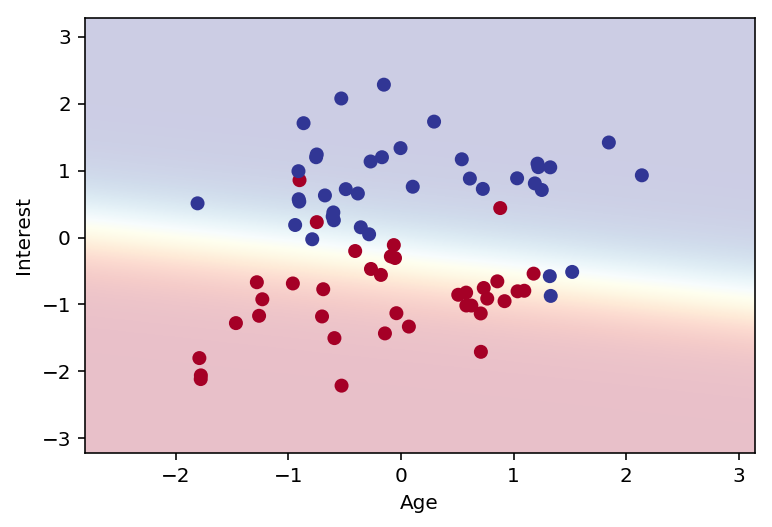

In [53]:
plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Age", ylabel = "Interest")

## Case 2: Breast cancer 

In [62]:
#define data frame
df = pd.read_csv("cancer.csv")
df = df.drop("id", axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
df.shape

(569, 31)

In [67]:
#first attempt: take all columns which we can retrieve from the above print out:
#define variables and proceed with train/test split
X = df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean","radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]].values
Y = df["diagnosis"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

In [68]:
#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test) #to predict if successful or not

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
print(model.score(X_test, Y_test))

0.965034965034965


In [77]:
#second attempt: take all columns for the logistic regression
X = df.drop("diagnosis", axis = 1).values
Y = df["diagnosis"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

In [78]:
#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test) #to predict if successful or not

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
print(model.score(X_test, Y_test))

0.958041958041958


Notice that the slight difference in the scores suggests that some of the columns reduce the quality of the prediction whereas others are of greater relevance.